In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [24]:
# récupérer des données
df = pd.read_csv('dataset/user_twitter_data.csv')
df = df.drop(columns=['user_id'])
df.head()

,aggressiveness_score,avg_url,avg_hashtag,ratio_followers_friend,avg_tweet_length,tweet_frequency,verified,visibility,account_age,avg_fav,group_popularity,mentions_freq
0,0.000228,0.5,1.0,35.327170,113.333333,2.0,True,0.000000,6527,0.202653,0.023220,0.666667
1,0.002857,0.0,0.0,3.251309,139.000000,1.0,False,0.000586,6518,0.260219,0.000102,1.000000
2,0.002857,1.0,0.0,9.445135,31.000000,1.0,False,0.000000,6518,1.556116,0.000962,0.000000
3,0.002857,0.0,1.0,19.555050,88.000000,1.0,True,0.000942,6518,0.438864,0.009637,0.000000
4,0.002857,0.0,3.0,4.709850,140.000000,1.0,False,0.002357,6518,1.028079,0.001372,1.000000


In [25]:
# matrice de corrélation
correlation_matrix = df.corr()
correlation_matrix

,aggressiveness_score,avg_url,avg_hashtag,ratio_followers_friend,avg_tweet_length,tweet_frequency,verified,visibility,account_age,avg_fav,group_popularity,mentions_freq
aggressiveness_score,1.000000,0.000217,-0.000740,-0.000015,0.000368,0.001315,-0.000367,-0.000073,-0.000774,0.000079,0.000243,0.000766
avg_url,0.000217,1.000000,-0.297611,0.002615,-0.203110,-0.010697,0.047542,-0.351341,0.026965,-0.008140,0.023989,-0.240599
avg_hashtag,-0.000740,-0.297611,1.000000,0.001908,0.201824,0.040557,-0.002593,0.706401,-0.064839,0.003914,0.002321,0.043101
ratio_followers_friend,-0.000015,0.002615,0.001908,1.000000,0.000949,0.006401,0.033736,-0.000672,0.004300,-0.000313,0.108378,-0.003946
avg_tweet_length,0.000368,-0.203110,0.201824,0.000949,1.000000,0.007373,0.023316,-0.106206,-0.071279,0.000460,0.014479,0.393146
tweet_frequency,0.001315,-0.010697,0.040557,0.006401,0.007373,1.000000,0.028306,0.031028,-0.006559,-0.003058,0.023165,-0.020904
verified,-0.000367,0.047542,-0.002593,0.033736,0.023316,0.028306,1.000000,-0.019724,0.098978,-0.004971,0.217044,-0.024879
visibility,-0.000073,-0.351341,0.706401,-0.000672,-0.106206,0.031028,-0.019724,1.000000,-0.044089,0.005207,-0.006902,0.229859
account_age,-0.000774,0.026965,-0.064839,0.004300,-0.071279,-0.006559,0.098978,-0.044089,1.000000,-0.042107,0.059018,-0.081944
avg_fav,0.000079,-0.008140,0.003914,-0.000313,0.000460,-0.003058,-0.004971,0.005207,-0.042107,1.000000,-0.003315,0.003605


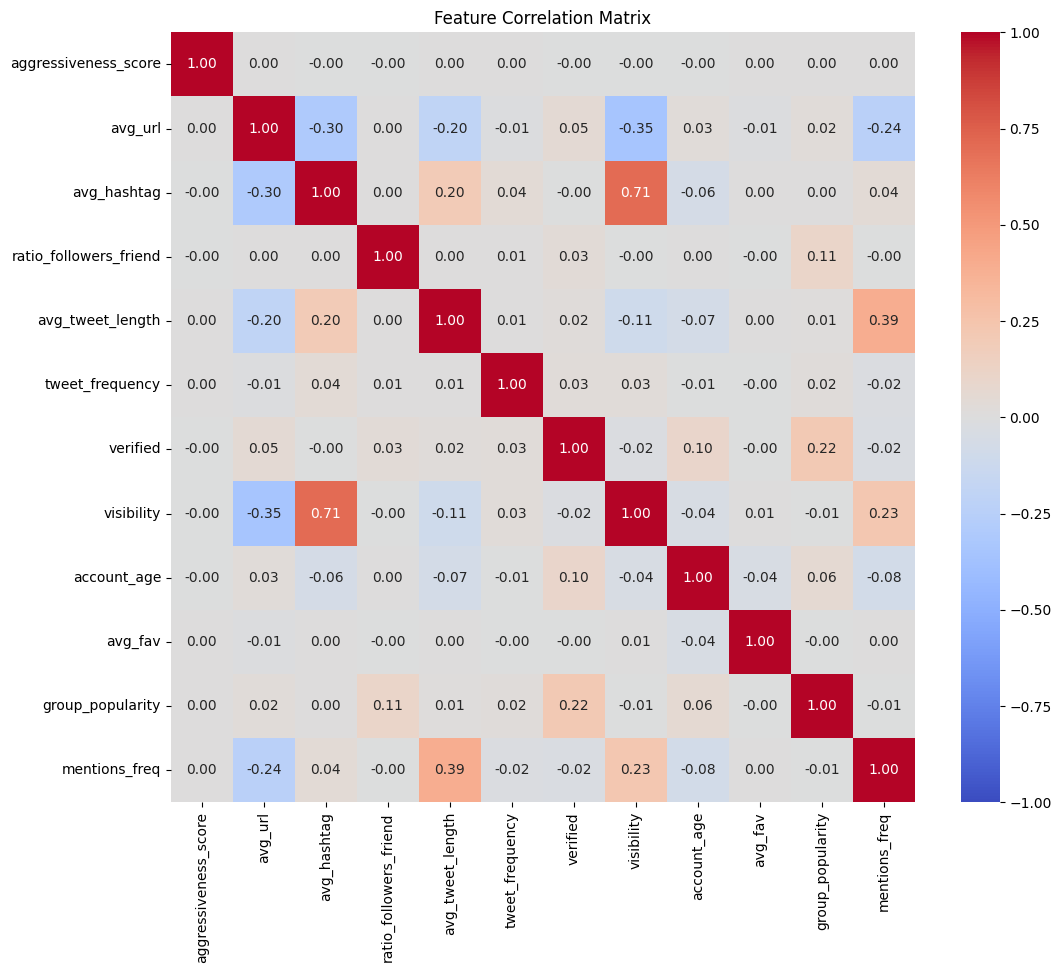

In [26]:
# Visualisation des corrélations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

In [27]:
# Caractéristiques standardisées
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [28]:
# Réaliser la réduction d'échelle par ACP
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

In [29]:
# Extraction des valeurs propres et calcul des ratios
eigenvalues = pca.explained_variance_
proportion = pca.explained_variance_ratio_ * 100
cumulative_proportion = np.cumsum(proportion)

# Calcul des différences
difference = - np.diff(eigenvalues)
difference = np.append(difference, np.nan)  # 最后一行的差异为 NaN

# Générer des données graphiques
data = {
    'Axis': np.arange(1, len(eigenvalues) + 1),
    'Eigen value': eigenvalues,
    'Difference': difference,
    'Proportion (%)': proportion,
    'Cumulative (%)': cumulative_proportion
}

# Création d'un DataFrame
df = pd.DataFrame(data)

# Ajouter une ligne de résumé
total = pd.DataFrame({
    'Axis': ['Tot.'],
    'Eigen value': [np.sum(eigenvalues)],
    'Difference': [np.nan],
    'Proportion (%)': [np.nan],
    'Cumulative (%)': [np.nan]
})

# données de connexion
df = pd.concat([df, total], ignore_index=True)
df

,Axis,Eigen value,Difference,Proportion (%),Cumulative (%)
0,1,2.095997,0.757429,17.466630,17.466630
1,2,1.338568,0.045480,11.154729,28.621359
2,3,1.293089,0.263437,10.775732,39.397091
3,4,1.029652,0.029048,8.580428,47.977518
4,5,1.000604,0.003247,8.338361,56.315880
5,6,0.997357,0.013716,8.311302,64.627182
6,7,0.983641,0.069628,8.197001,72.824182
7,8,0.914012,0.139903,7.616765,80.440947
8,9,0.774109,0.046787,6.450903,86.891850
9,10,0.727322,0.032973,6.061010,92.952861


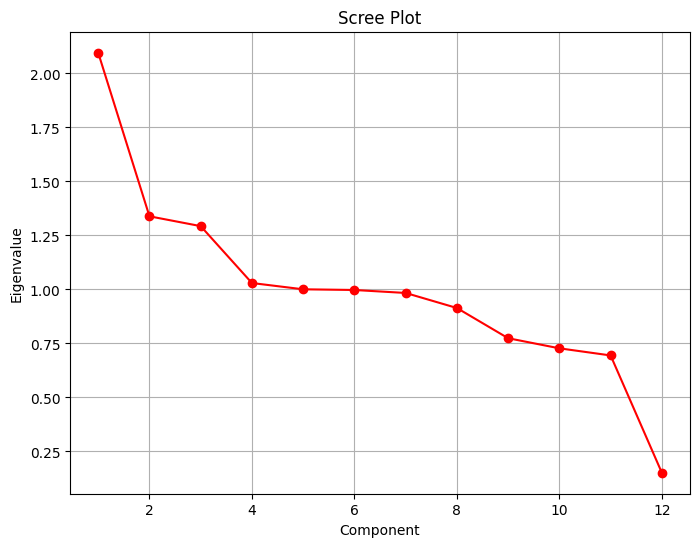

In [30]:
# Extraction des valeurs propres
eigenvalues = pca.explained_variance_

# Cartographie des débris
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='red')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')


plt.grid()
plt.show()

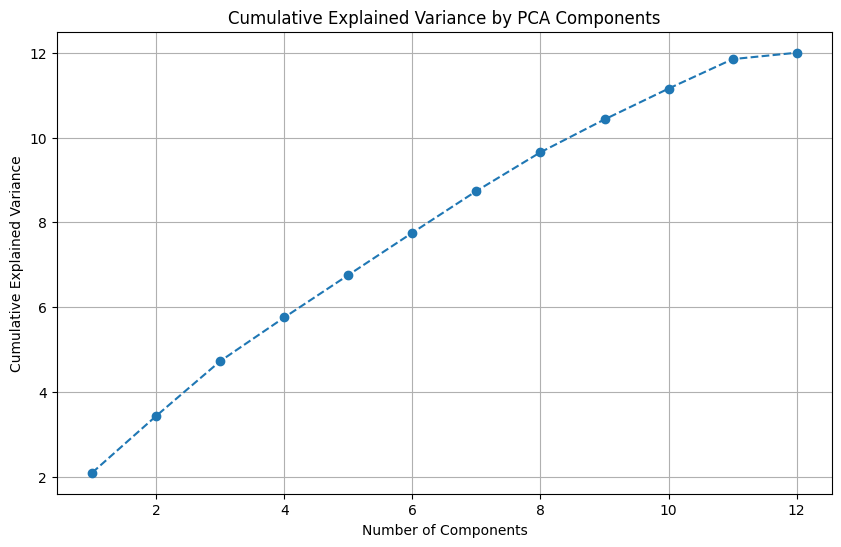

In [31]:
# Visualisation de la proportion de variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), np.cumsum(eigenvalues), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.grid()
plt.show()

Dans l'analyse en composantes principales (ACP), la contribution de chaque composante principale reflète sa proportion de la variance totale expliquée dans les données originales. La proportion cumulative de la variance expliquée augmente avec le nombre de composantes principales, ce qui montre la capacité d'expliquer la variance des données en augmentant le nombre de composantes principales.
Dans les graphiques fournis, les 10 premières composantes principales expliquent environ 90 % de la variance, et l'ajout d'autres composantes principales par la suite n'augmente que relativement peu la variance expliquée cumulée.
Par conséquent, si l'objectif est de conserver la plupart des informations des données d'origine et de réduire le nombre de caractéristiques, la sélection des 10 premières composantes principales peut être un choix approprié.
Souvent, cependant, nous recherchons un "point de coude" où la courbe de la variance expliquée cumulative commence à s'aplatir, de sorte que 11 composantes principales peuvent également constituer le meilleur choix.

In [32]:
# Effectuer une ACP en réduisant à 11 dimensions
pca = PCA(n_components=11)
pca_data = pca.fit_transform(scaled_data)

# Variance expliquée pour 11 composantes
explained_variance = pca.explained_variance_ratio_

# Fonction permettant de créer un tableau avec les coordonnées, CTR et COS^2 pour les 11 composantes principales
def create_pca_table_all_axes(df, pca, explained_variance):
    pca_tables = []
    for i in range(11):
        pc = pca.components_[i]
        coordinates = pc
        ctr = explained_variance[i] * 100
        cos2 = np.square(pc) * 100
        
        # Veiller à ce que toutes les colonnes aient la même longueur
        length = len(df.columns)
        pca_table = pd.DataFrame({
            'Modele': df.columns[:length],
            f'Coord. (Axe {i+1})': coordinates[:length],
            f'CTR (Axe {i+1})': [ctr] * length,
            f'Cos^2 (Axe {i+1})': cos2[:length]
        })
        
        # Format des colonnes de pourcentage
        pca_table[f'CTR (Axe {i+1})'] = pca_table[f'CTR (Axe {i+1})'].apply(lambda x: f"{x:.0f}%")
        pca_table[f'Cos^2 (Axe {i+1})'] = pca_table[f'Cos^2 (Axe {i+1})'].apply(lambda x: f"{x:.0f}%")
        
        pca_tables.append(pca_table)
    
    # Fusionner tous les tableaux d'axes individuels en un seul DataFrame
    final_pca_table = pca_tables[0]
    for i in range(1, 11):
        final_pca_table = pd.merge(final_pca_table, pca_tables[i], on='Modele')
    
    # Calculer SUM(Cos^2)
    cos2_columns = [col for col in final_pca_table.columns if 'Cos^2' in col]
    final_pca_table['SUM(Cos^2)'] = final_pca_table[cos2_columns].apply(
        lambda row: sum([int(val.strip('%')) for val in row]), axis=1).apply(lambda x: f"{x}%")
    
    return final_pca_table

# Créer le tableau de l'ACP pour les 11 axes
pca_table_all_axes = create_pca_table_all_axes(df, pca, explained_variance)

# Enregistrer le tableau final de l'ACP dans un fichier CSV
pca_table_all_axes.to_csv('pca_table_all_axes.csv', index=False)

# Afficher le tableau
print(pca_table_all_axes)

           Modele  Coord. (Axe 1) CTR (Axe 1) Cos^2 (Axe 1)  Coord. (Axe 2)  \
0            Axis       -0.000039         17%            0%       -0.002672   
1     Eigen value       -0.451703         17%           20%        0.073802   
2      Difference        0.545142         17%           30%        0.319023   
3  Proportion (%)       -0.005746         17%            0%        0.078742   
4  Cumulative (%)        0.258262         17%            7%       -0.594725   

  CTR (Axe 2) Cos^2 (Axe 2)  Coord. (Axe 3) CTR (Axe 3) Cos^2 (Axe 3)  ...  \
0         11%            0%        0.000341         11%            0%  ...   
1         11%            1%       -0.019111         11%            0%  ...   
2         11%           10%       -0.024205         11%            0%  ...   
3         11%            1%        0.300770         11%            9%  ...   
4         11%           35%        0.268423         11%            7%  ...   

   Coord. (Axe 9) CTR (Axe 9) Cos^2 (Axe 9)  Coord. (Axe

"avg_hashtag" et la "visibility" contribuent le plus sur le premier composant principal, probablement liés à l'interaction des utilisateurs et à la visibilité. Le "ratio_followers_friend" et la "avg_tweet_length" contribuent respectivement significativement sur le deuxième et le troisième composant principal, indiquant leur importance pour les relations sociales et la longueur des tweets. La "mentions_freq" montre une forte contribution sur le huitième composant principal, probablement liée à l'influence sociale. Ces découvertes nous aident à identifier les caractéristiques clés et fournissent une base pour une analyse ultérieure.